In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
directory =  "forward/subj1/" # "backward/subj0/"

feedback_blocks_dict = {
    "forward/subj1/": {
        'Complete': [1, 2, 3],  # Normal feedback type
        'Trajectory': [4, 5, 6],
        'End Position': [7, 8, 9],
        'Reinforcement Learning': [10, 11, 12]},
    "backward/subj0/": {
        'Complete': [10, 11, 12],  # Normal feedback type
        'Trajectory': [7, 8, 9],
        'End Position': [4, 5, 6],
        'Reinforcement Learning': [1, 2, 3]},
}

In [8]:
geometry_specs = np.loadtxt(directory + "geometry_specs.csv", delimiter=',')
print(geometry_specs)

SCREEN_WIDTH, SCREEN_HEIGHT = geometry_specs[0], geometry_specs[1]
TABLE_WIDTH = SCREEN_WIDTH - 100
TABLE_HEIGHT = int(SCREEN_HEIGHT * 0.9)
ZONE_WIDTH = int(TABLE_WIDTH * 0.95)
ZONE_HEIGHT = 150
TABLE_RECT = [(SCREEN_WIDTH - TABLE_WIDTH) // 2, (SCREEN_HEIGHT - TABLE_HEIGHT) // 2, TABLE_WIDTH, TABLE_HEIGHT]
SCORING_RECT = [(SCREEN_WIDTH - ZONE_WIDTH) // 2, int(TABLE_HEIGHT * 0.2), ZONE_WIDTH, ZONE_HEIGHT]

[1470.  956.]


In [9]:
trial_positions = np.loadtxt(directory + 'trial_positions.csv', delimiter=',')
print(trial_positions[:4])

# TODO: extract and do for each feedback type
def get_xy_coords(trial_positions, first_block = 1, end_block = 3):
    blocks = []
    for block in range(first_block, end_block + 1):
        block_positions = trial_positions[trial_positions[:, -1] == block]
        x, y = block_positions[:, 0], block_positions[:, 1]
        blocks.append((x, y))
    return blocks

[[450.07390516 487.96777546   1.        ]
 [378.28019909 370.94960542   1.        ]
 [240.26815881  66.97207083   1.        ]
 [138.48993044 140.9289017    1.        ]]


In [10]:
def plot_feedback_type(axis, xy_coords, feedback_type = "None", save_fig = False):
    x1, y1 = xy_coords[0]
    x2, y2 = xy_coords[1]
    x3, y3 = xy_coords[2]

    # Plot points for each block
    axis.scatter(x1, y1, color='yellow', label='1. Block (Unperturbed)', alpha=0.8)
    axis.scatter(x2, y2, color='blue', label='2. Block (Perturbed)', alpha=0.8)
    axis.scatter(x3, y3, color='orange', label='3. Block (Unperturbed)', alpha=0.8)

    # Add shaded regions
    top_left_x_coord, top_left_y_coord = SCORING_RECT[0], SCORING_RECT[1]
    width, height = SCORING_RECT[2], SCORING_RECT[3]
    x_shaded = np.linspace(0, width, 100)
    y_shaded = (top_left_y_coord + height) - height / width * x_shaded # Example equation
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord, color='green', alpha=0.3)
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord + height, color='red', alpha=0.3)

    # Draw outer rectangle
    top_left_x_coord, top_left_y_coord = TABLE_RECT[0], TABLE_RECT[1]
    width, height = TABLE_RECT[2], TABLE_RECT[3]
    axis.plot([top_left_x_coord, top_left_x_coord + width, top_left_x_coord + width, top_left_x_coord, top_left_x_coord], 
            [top_left_y_coord, top_left_y_coord, top_left_y_coord + height,  top_left_y_coord + height, top_left_y_coord], color='brown', lw=2)

    axis.grid(True)

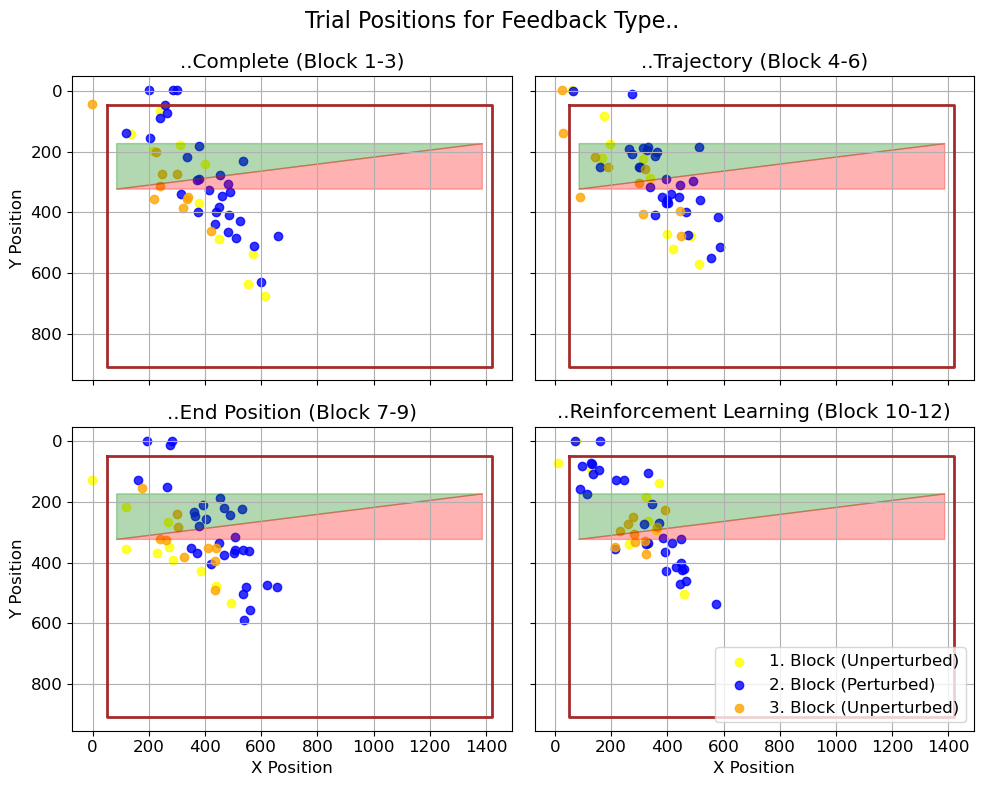

In [12]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

plt.suptitle("Trial Positions for Feedback Type..", fontsize=16)
for idx, (feedback_type, blocks) in enumerate(feedback_blocks_dict[directory].items()):
    xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=blocks[0], end_block=blocks[-1])
    axes[idx // 2, idx % 2].set_title(".." + feedback_type + " (Block {}-{})".format(blocks[0], blocks[-1]))
    plot_feedback_type(axes[idx // 2, idx % 2], xy_coords=xy_coords, feedback_type=feedback_type)

axes[0, 0].invert_yaxis()
axes[1, 1].legend(loc = "lower right")
axes[1, 0].set_xlabel('X Position')
axes[1, 1].set_xlabel('X Position')
axes[0, 0].set_ylabel('Y Position')
axes[1, 0].set_ylabel('Y Position')

plt.tight_layout()
plt.savefig(directory + 'scatter_plot.png')
plt.show()